# Welcome!

This notebook will introduce the main packages we will be using in this course:

* `numpy` for numerical calculations
* `matplotlib` for visualisation
* `pandas` for data wrangling
* `statsmodels` for statistics

## NumPy

Numpy provides the _array_ data type and a wide range of functions to work with them. This pacakge forms the foundation for most scientific computation done with python. Spending time getting comfortable with using numpy is a wise investment. You can find resources to help you learn numpy [here](https://numpy.org/learn/).

## Matplotlib

Matplotlib is a general purpose plotting library for python. Visualisation is a key skill of the statistician, learning how to use an established plotting library is another wise investment. You can view a gallery of images made using matplotlib and their associated code [here](https://matplotlib.org/stable/gallery/index.html).

### Alternatives

There are many plotting libraries out there. Matplotlib is probably the most established plotting library in python so it is a good place to start. If you want to explore alternatives, [seaborn](https://seaborn.pydata.org/index.html) is a wrapper around matplotlib designed for statistical graphics and [altair](https://altair-viz.github.io/) is a more powerful declarative plotting package.

## Pandas

Much of the data we will consider in this coarse is _tabular_, meaning it can be represented as a table of values. The _dataframe_ is a data structure particularly well suited for working with tabular data. If you have any experience with R you will no doubt be familiar with its `data.frame`s. Pandas is an attempt to bring this functionality to the python ecosystem.

## Statsmodels

In the sections below we will demonstrate some of the core functionality of these packages.

# Numpy

In [1]:
import numpy as np

In [2]:
x = np.linspace(0, 7, 100)

There are lots of things we want to be able to do with arrays: find the minimum and maximum, and sum of the values for example.

In [3]:
x.min
x.max
np.sum(x)

350.00000000000006

We might also want to count how many values are bigger than some threshold

In [4]:
x[x > 3].size 

57

We can evaluate the sine function on each element of the array.

In [5]:
y1 = np.sin(x)

We can create a new array with random values in it.

In [6]:
y2 = np.random.randn(x.size)

# Matplotlib

In [7]:
import matplotlib.pyplot as plt

## Line plot

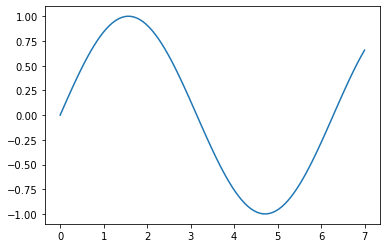

In [8]:
plt.plot(x, y1)
plt.show()

## Scatter plot

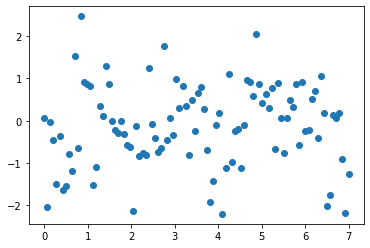

In [9]:
plt.scatter(x, y2)
plt.show()

## Histogram

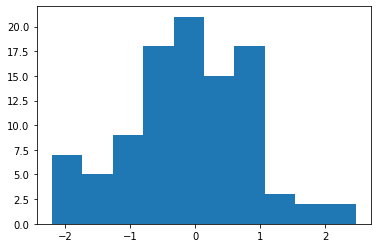

In [10]:
plt.hist(y2, bins = 10)
plt.show()

## Multiple layers

<ipython-input-11-b199cb8da210>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


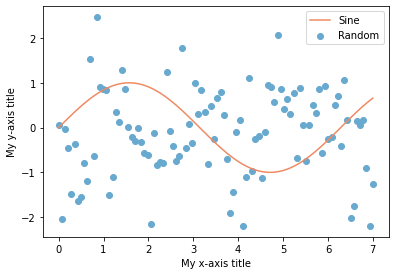

In [11]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x, y1, color = "#ef8a62", label = "Sine")
ax.scatter(x, y2, color = "#67a9cf", label = "Random")
ax.legend(loc = "upper right")
ax.set_xlabel("My x-axis title")
ax.set_ylabel("My y-axis title")
fig.show()
# fig.savefig("demo-figure.png", dpi = 300)

## Challenge

Without looking at the answer below, attmpet to create this plot where the number in the title is computed correctly for your random points.

<img src="./challenge-figure.png" style="width: 600px;"/>

<ipython-input-12-f587a590854a>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


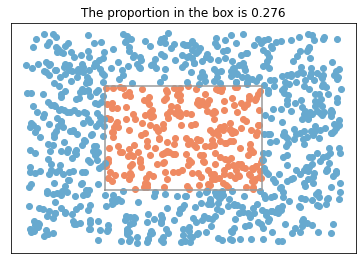

In [12]:
x = np.random.uniform(size = 1000)
y = np.random.uniform(size = 1000)
mask = (0.25 < x) & (x < 0.75) & (0.25 < y) & (y < 0.75)
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot([0.25,0.25,0.75,0.75,0.25], [0.25,0.75,0.75,0.25,0.25], color = "#999999")
ax.scatter(x[mask], y[mask], color = "#ef8a62")
ax.scatter(x[np.logical_not(mask)], y[np.logical_not(mask)], color = "#67a9cf")
ax.set_title('The proportion in the box is {x}'.format(x= mask.sum() / mask.size))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.show()

# Pandas

# Statsmodels